In this data question you will be working data of service request related to missed trash pickups from hubNashville, Metro Nashville government's comprehensive customer service system (https://hub.nashville.gov).

As part of Metro's contract with Red River Waste Solutions, failure to remedy an action or inaction will result in liquidated damages. One category of liquidated damages is related to chronic problems in any category of service at the same premises. A chronic problem is defined as more than one missed pickup for any address. The first missed pickup will not result in a fine; however, every subsequent missed pickup will result in a $200 fine.

Your job is to determine the total amount of damages due to missed pickups. Note that not all rows that you have been provided correspond to missed pickups and that you will need to ensure that you are only counting missed pickups.

* What other types of complaints are there?
* Are there any geospatial analysis you can do?  Which visualizations can you create?
* How do metro crews compare to the contractor's performance?
* How much does each trash hauler owe?
* What were to total missed pickup by route?

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
trashpickup_df = pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')

In [3]:
trashpickup_df.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861


In [4]:
trashpickup_df.tail()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20222,267126,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016,-86.741242,36.169482
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637
20225,267137,11/1/2019,Trash - Curbside/Alley Missed Pickup,possibly others missed as well,"604 Somerset Ct, Nashville, TN 37217, United S...",37217.0,RED RIVER,2505,29.0,1781360.323,637742.0068,-86.633331,36.083675


In [5]:
missed_pickups = trashpickup_df[trashpickup_df['Request'].str.contains('missed|pickup', case=False, na=False)]

In [6]:
missed_pickups.tail()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20222,267126,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016,-86.741242,36.169482
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637
20225,267137,11/1/2019,Trash - Curbside/Alley Missed Pickup,possibly others missed as well,"604 Somerset Ct, Nashville, TN 37217, United S...",37217.0,RED RIVER,2505,29.0,1781360.323,637742.0068,-86.633331,36.083675


In [7]:
address_counts = missed_pickups.groupby('Incident Address').size().reset_index(name='count')

In [8]:
address_counts.tail()

,Incident Address,count
11411,"Trevino Pl, Nashville, TN 37013, United States",1
11412,"Tusculum Rd, Nashville, TN , United States",3
11413,"Westboro Dr, Nashville, TN 37209, United States",1
11414,brick church pike,1
11415,xavier dr,1


In [9]:
address_counts['damages'] = (address_counts['count'] - 1) * 200
address_counts['damages'] = address_counts['damages'].clip(lower=0)

In [10]:
total_damages = address_counts['damages'].sum()
print(f"Total liquidated damages: ${total_damages:,.2f}")

Total liquidated damages: $720,800.00


In [11]:
complaint_types = trashpickup_df['Request'].value_counts()
print("\nComplaint types:")
print(complaint_types.head())


Complaint types:
Request
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64


In [12]:
hauler_damages = pd.merge(address_counts,
                          trashpickup_df[['Incident Address', 'Trash Hauler']].drop_duplicates(),
                          on='Incident Address',
                          how='left')

hauler_totals = hauler_damages.groupby('Trash Hauler')['damages'].sum().sort_values(ascending=False)
print("\nDamages by hauler:")
print(hauler_totals)


Damages by hauler:
Trash Hauler
RED RIVER    544000
METRO        121800
WASTE IND     46000
Metro          5000
Name: damages, dtype: int64


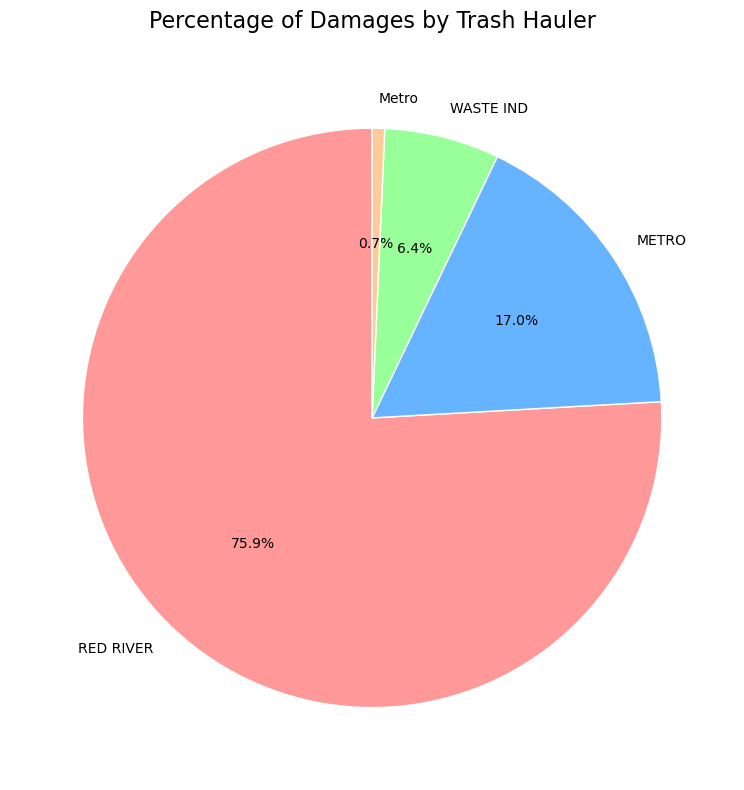

In [29]:
plt.figure(figsize=(10, 8))
hauler_totals.plot.pie(autopct='%1.1f%%', 
                       startangle=90,
                       colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
                       wedgeprops={'linewidth': 1, 'edgecolor': 'white'})


plt.title('Percentage of Damages by Trash Hauler', fontsize=16, pad=20)
plt.ylabel('') 
plt.tight_layout()


plt.show()

In [13]:
route_counts = missed_pickups['Trash Route'].value_counts().sort_values(ascending=False)
print("\nMissed pickups by route:")
print(route_counts.head(30))


Missed pickups by route:
Trash Route
4504    305
4404    246
3302    230
3305    215
9303    209
3503    204
3303    198
4304    196
3412    194
3201    194
2405    193
9208    190
9203    190
2505    190
3203    181
2305    172
4502    172
4303    170
4203    169
4403    166
3301    165
4204    164
4510    163
1201    160
3202    158
2203    158
1501    157
3204    156
1301    155
3502    151
Name: count, dtype: int64


In [14]:
district_counts = missed_pickups['Council District'].value_counts().sort_values(ascending=False)
print("\nMissed pickups by council district:")
print(district_counts)


Missed pickups by council district:
Council District
25.0    943
21.0    756
8.0     733
2.0     719
16.0    680
6.0     662
15.0    654
7.0     633
29.0    624
5.0     622
33.0    610
24.0    577
20.0    538
1.0     498
34.0    496
17.0    494
23.0    479
30.0    474
19.0    467
27.0    439
32.0    432
18.0    395
31.0    390
28.0    379
26.0    353
9.0     328
4.0     210
14.0    129
3.0     125
13.0    108
22.0     32
11.0      4
12.0      3
35.0      3
10.0      2
Name: count, dtype: int64


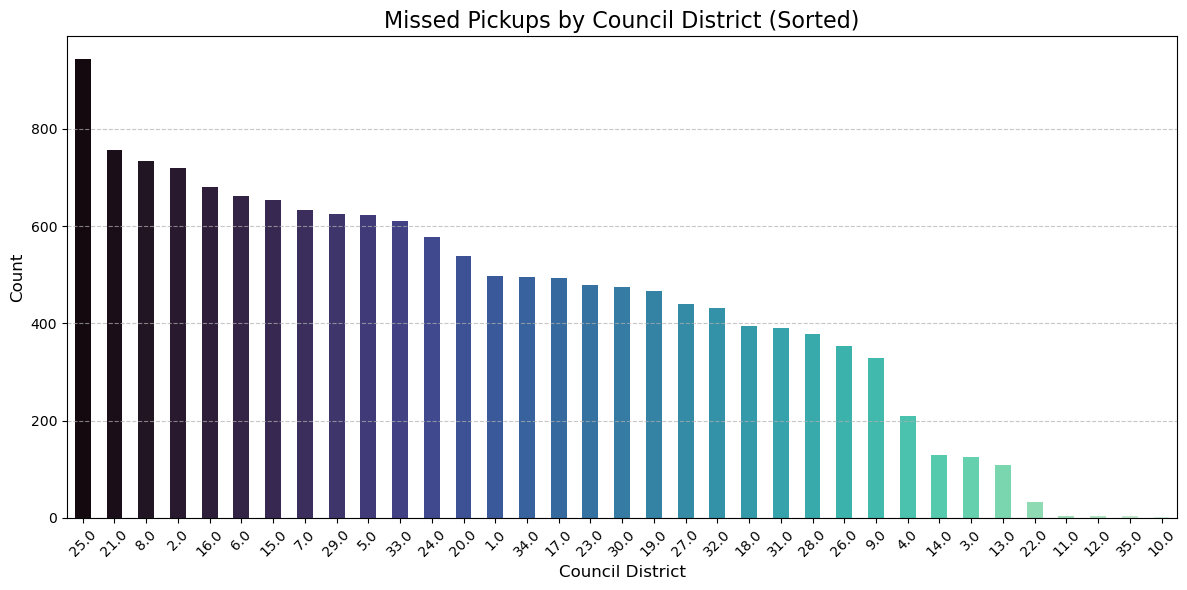

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns  

plt.figure(figsize=(12, 6))
district_counts.plot.bar(color=sns.color_palette("mako", len(district_counts)))
plt.title('Missed Pickups by Council District (Sorted)', fontsize=16)
plt.xlabel('Council District', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
missed = trashpickup_df[trashpickup_df['Request'].str.contains('missed|pickup', case=False, na=False)]
total_incidents = len(missed)
unique_houses = missed['Incident Address'].nunique()

print(f"Total missed pickup incidents: {total_incidents:,}")
print(f"Unique addresses with missed pickups: {unique_houses:,}")

Total missed pickup incidents: 15,028
Unique addresses with missed pickups: 11,416


In [17]:
max_fine = total_incidents * 200  
print(f"\nMaximum potential fines: ${max_fine:,.2f}")


Maximum potential fines: $3,005,600.00


In [18]:
house_counts = missed.groupby('Incident Address').size()

chronic_houses = house_counts[house_counts > 1]
actual_fines = (chronic_houses.sum() - len(chronic_houses)) * 200

print(f"\nHouses with repeat incidents: {len(chronic_houses):,}")
print(f"Actual fines owed: ${actual_fines:,.2f}")


Houses with repeat incidents: 2,226
Actual fines owed: $720,800.00


In [19]:
pct_chronic = len(chronic_houses)/unique_houses * 100

adjusted_max = max_fine * (pct_chronic/100)

print(f"\nValidation:")
print(f"Percentage of houses with repeats: {pct_chronic:.1f}%")
print(f"Adjusted maximum: ${adjusted_max:,.2f}")
print(f"Actual fines: ${actual_fines:,.2f}")
print(f"Difference: ${(actual_fines-adjusted_max):,.2f}")


Validation:
Percentage of houses with repeats: 19.5%
Adjusted maximum: $586,060.41
Actual fines: $720,800.00
Difference: $134,739.59


In [20]:
red_river_missed = trashpickup_df[
    (trashpickup_df['Trash Hauler'].str.contains('Red River', case=False, na=False)) &
    (trashpickup_df['Request'].str.contains('missed|pickup', case=False, na=False))
].copy()


incident_counts = red_river_missed.groupby('Incident Address').size().reset_index(name='total_incidents')


incident_counts['fineable_incidents'] = incident_counts['total_incidents'] - 1
incident_counts['fineable_incidents'] = incident_counts['fineable_incidents'].clip(lower=0) 


incident_counts['fines'] = incident_counts['fineable_incidents'] * 200


total_fines = incident_counts['fines'].sum()
chronic_addresses = len(incident_counts[incident_counts['fineable_incidents'] > 0])

print(f"Red River Waste Solutions Analysis:")
print(f"Total addresses with missed pickups: {len(incident_counts):,}")
print(f"Addresses with fineable incidents (chronic problems): {chronic_addresses:,}")
print(f"Total fines owed: ${total_fines:,.2f}")
print("\nTop 10 worst addresses:")
print(incident_counts.sort_values('fineable_incidents', ascending=False).head(10))

Red River Waste Solutions Analysis:
Total addresses with missed pickups: 8,190
Addresses with fineable incidents (chronic problems): 1,551
Total fines owed: $504,800.00

Top 10 worst addresses:
                                       Incident Address  total_incidents  \
750   12546 Old Hickory Blvd, Nashville, TN 37013, U...               19   
7752  802 Crescent Rd, Nashville, TN 37205, United S...               16   
6269                           5135 Hickory Hollow Pkwy               16   
6888   607 Estes Rd, Nashville, TN 37215, United States               15   
4425                                  3710 N NATCHEZ CT               14   
6787  6007 Obrien Ave, Nashville, TN 37209, United S...               14   
3688  320 Old Hickory Blvd, Nashville, TN 37221, Uni...               12   
1138  1537 Harding Pl, Nashville, TN 37215, United S...               11   
374   111 Barton Ln, Nashville, TN 37214, United States               11   
4753                                   3929 St

In [21]:
total_fines = incident_counts['fines'].sum()
chronic_addresses = len(incident_counts[incident_counts['fineable_incidents'] > 0])

In [22]:
total_addresses = 8190
chronic_addresses = 1551
total_fines = 504800

print(f"Chronic problem rate: {chronic_addresses/total_addresses:.1%}")
print(f"Average fine per chronic address: ${total_fines/chronic_addresses:,.0f}")

Chronic problem rate: 18.9%
Average fine per chronic address: $325


In [23]:
worst_addresses = red_river_missed[
    red_river_missed['Incident Address'].isin(
        incident_counts.head(10)['Incident Address']
    )
]

print("Routes needing urgent attention:")
print(worst_addresses['Trash Route'].value_counts().head(3))

Routes needing urgent attention:
Trash Route
1302     4
2505     2
3302S    1
Name: count, dtype: int64


In [24]:
top_50 = incident_counts.head(50)
problem_zones = red_river_missed[
    red_river_missed['Incident Address'].isin(top_50['Incident Address'])
]

print("\nCommon traits in top 50 problem addresses:")
print(f"- Most frequent zip: {problem_zones['Zip Code'].mode()[0]}")
print(f"- Most common route: {problem_zones['Trash Route'].mode()[0]}")


Common traits in top 50 problem addresses:
- Most frequent zip: 37013.0
- Most common route: 3505


In [25]:
red_river_missed['Date Opened'] = pd.to_datetime(red_river_missed['Date Opened'])

rr_sorted = red_river_missed.sort_values(['Incident Address', 'Date Opened'])

alt1_fines = 0
fine_log = []

for address, group in rr_sorted.groupby('Incident Address'):
    dates = group['Date Opened'].sort_values().reset_index(drop=True)
    
    i = 0
    while i <= len(dates) - 3:
        window = dates[i:i+3]
        if (window.iloc[-1] - window.iloc[0]).days <= 180:
            alt1_fines += 1500
            fine_log.append({'address': address, 'window': window})
            i += 3  
        else:
            i += 1

print(f"Method 1 Total Fines: ${alt1_fines:,}")

Method 1 Total Fines: $652,500


In [26]:
import folium
from folium.plugins import HeatMap
import pandas as pd

red_river_clean = red_river_missed.dropna(subset=['LATITUDE', 'LONGITUDE']).copy()
red_river_clean = red_river_clean[
    (red_river_clean['LATITUDE'].between(35, 37)) & 
    (red_river_clean['LONGITUDE'].between(-87, -86))
]

m = folium.Map(location=[36.16, -86.78], zoom_start=11)

HeatMap(
    red_river_clean[['LATITUDE', 'LONGITUDE']].sample(5000),  
    radius=10,  
    blur=5,
    min_opacity=0.2
).add_to(m)

address_layer = MarkerCluster(
    name="Show Addresses (Zoom In)",
    overlay=True,
    control=False,  
    disableClusteringAtZoom=15  
)


for idx, row in red_river_clean.sample(min(1000, len(red_river_clean))).iterrows():
    popup_content = f"""
    <div style="width: 250px">
        <h4 style="margin-bottom:5px">Service Request Details</h4>
        <hr style="margin:5px 0">
        <p><b>Type:</b> {row.get('Request', 'N/A')}</p>
        <p><b>Address:</b> {row.get('Incident Address', 'N/A')}</p>
        <p><b>Date:</b> {row.get('Date Opened', 'N/A')}</p>
        <hr style="margin:5px 0">
        <p><b>Description:</b><br>{row.get('Description', 'No description available')}</p>
    </div>
    """
    
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        color='#3186cc',
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(popup_content, max_width=300),
        tooltip="Click for details"
    ).add_to(address_layer)

address_layer.add_to(m)

title_html = """
     <h3 align="center" style="font-size:16px"><b>Red River Waste Solutions - Missed Pickup Heatmap</b></h3>
     """
m.get_root().html.add_child(folium.Element(title_html))


m